In [6]:
%matplotlib inline
import ipywidgets as widgets
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

In [7]:
data = pd.read_csv("pomiary.csv")

In [3]:
def ploting(hidden_infectivity=0.4, physical_infectivity=0.6, nodes_number=100, savepath="plots/basic_model/figure1.svg"):
    df = data.loc[(data['hidden_infectivity'] == hidden_infectivity) & (data['physical_infectivity'] == physical_infectivity) & (data['nodes'] == nodes_number)]
    test = df[['beta', 'lambda', 'aware', 'infected']]

    fig = plt.figure(constrained_layout=True, figsize=(14,10))
    grid = fig.add_gridspec(10, 2)

    ax1 = fig.add_subplot(grid[0:4, 0])
    ax2 = fig.add_subplot(grid[0:4, 1])
    ax3 = fig.add_subplot(grid[4, 0])
    ax4 = fig.add_subplot(grid[4, 1])
    ax5 = fig.add_subplot(grid[5:9, 0])
    ax6 = fig.add_subplot(grid[5:9, 1])
    ax7 = fig.add_subplot(grid[9, 0])
    ax8 = fig.add_subplot(grid[9, 1])

    fig.suptitle(f"Reasult of model for network with {nodes_number} nodes unawere probability {hidden_infectivity} and recover probability {physical_infectivity}")

    aware_pivot = test.pivot(columns='beta', index='lambda', values='aware')
    sns.heatmap(aware_pivot, annot=True, vmax=aware_pivot.max().max(), vmin=aware_pivot.min().min(), cmap="YlOrRd", ax=ax1)
    ax1.set_title('Probability of being aware')

    deriv_aware = aware_pivot.diff(periods=1, axis=1)*10
    sns.heatmap(deriv_aware, annot=True, vmax=deriv_aware.max().max(), vmin=deriv_aware.min().min(), ax=ax2)
    ax2.set_title('Derivation of being aware')

    aware_avg = aware_pivot.mean(axis=0).to_frame("avg").T
    sns.heatmap(aware_avg, cmap="YlOrRd", cbar=False, annot=True, ax=ax3)
    ax3.set_title('Average of aware prob by lambda')

    deriv_aware_avg = deriv_aware.mean(axis=0).to_frame("avg").T
    sns.heatmap(deriv_aware_avg, cbar=False, annot=True, ax=ax4)
    ax4.set_title('Average of derivation of being aware by lambda')

    infected_pivot = test.pivot(columns='beta', index='lambda', values='infected')
    sns.heatmap(infected_pivot, annot=True, vmax=infected_pivot.max().max(), vmin=infected_pivot.min().min(), cmap="YlOrRd", ax=ax5)
    ax5.set_title('Probability of being infected')

    deriv_infected = infected_pivot.diff(periods=1, axis=1)*10
    sns.heatmap(deriv_infected, annot=True, vmax=deriv_infected.max().max(), vmin=deriv_infected.min().min(), ax=ax6)
    ax6.set_title('Derivation of being infected')

    infected_avg = infected_pivot.mean(axis=0).to_frame("avg").T
    sns.heatmap(infected_avg, cmap="YlOrRd", cbar=False, annot=True, ax=ax7)
    ax7.set_title('Average of being infected prob by lambda')

    deriv_infected_avg = deriv_infected.mean(axis=0).to_frame("avg").T
    sns.heatmap(deriv_infected_avg, cbar=False, annot=True, ax=ax8)
    ax8.set_title('Average of derivation of being infected by lambda')
    plt.savefig(savepath)

<ipython-input-3-14f66aa5cd62>:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(constrained_layout=True, figsize=(14,10))


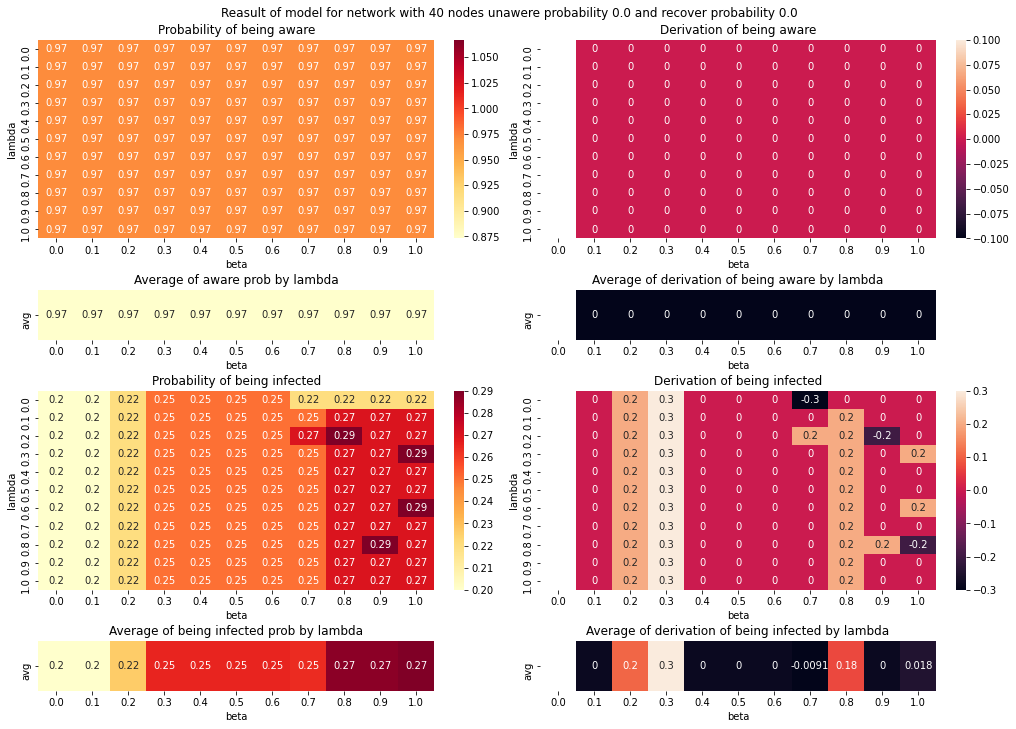

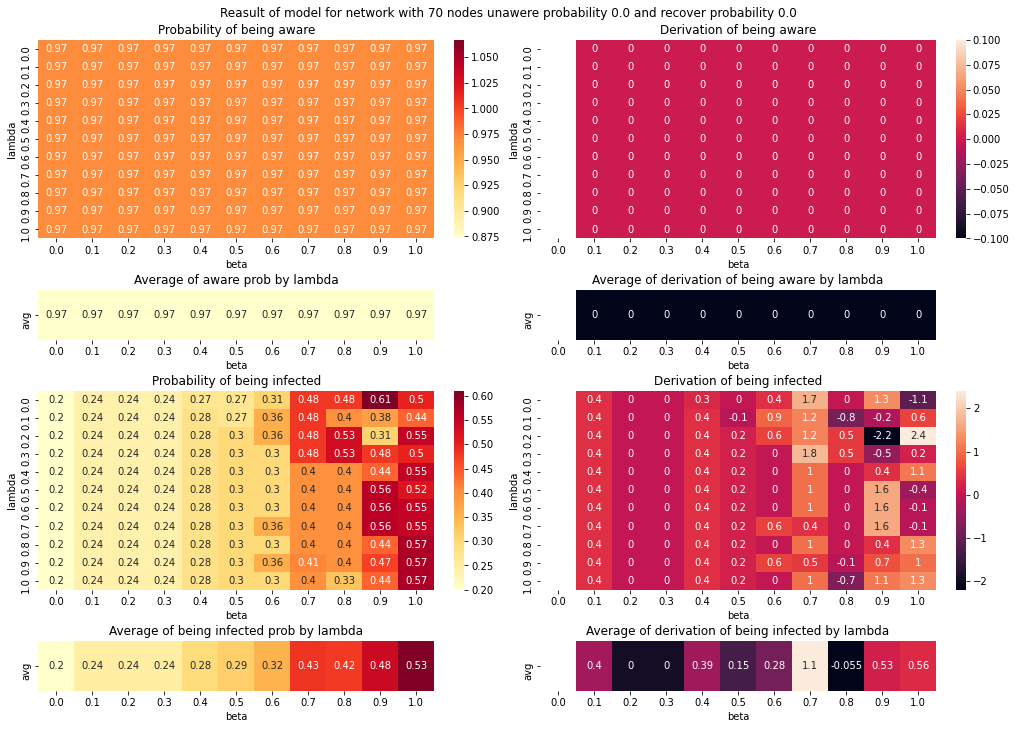

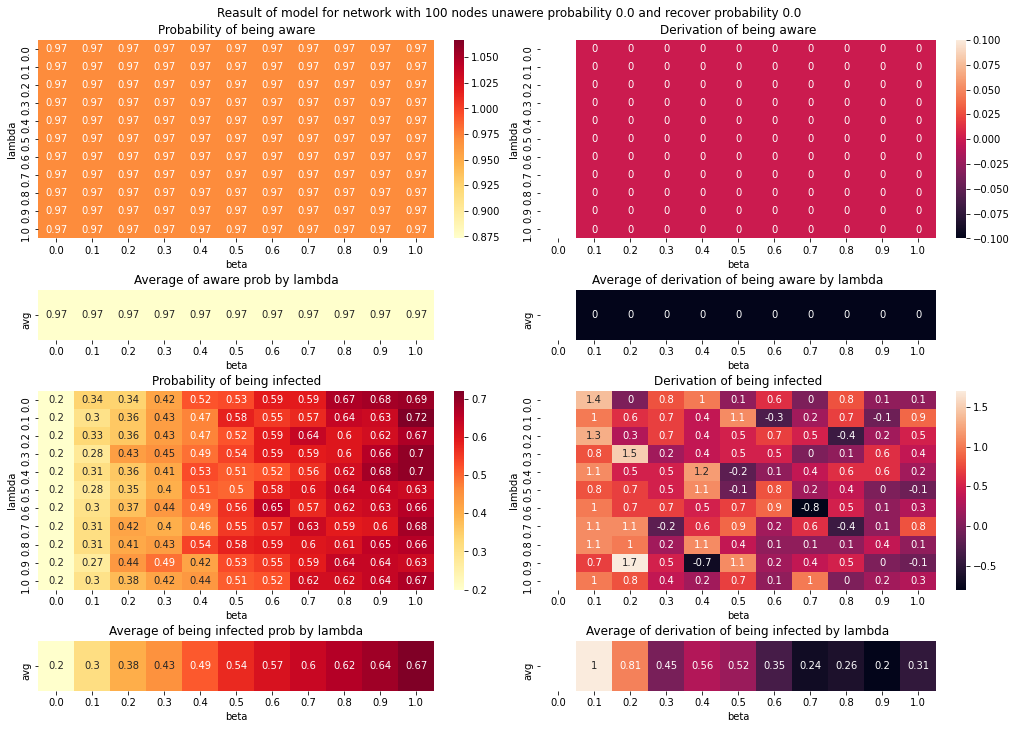

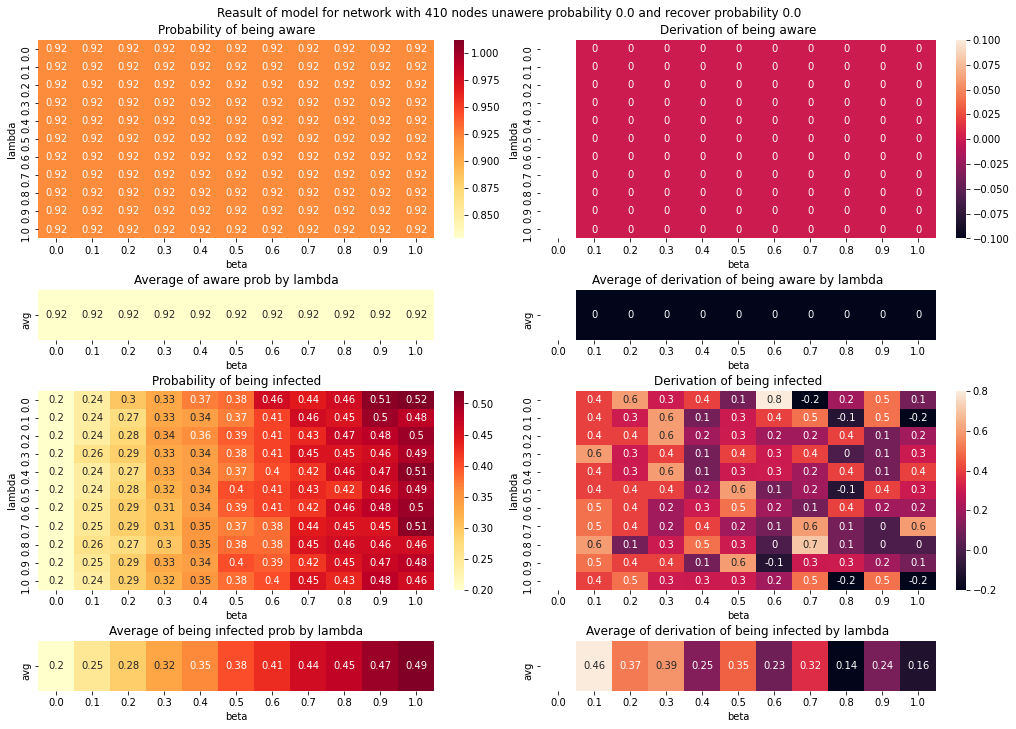

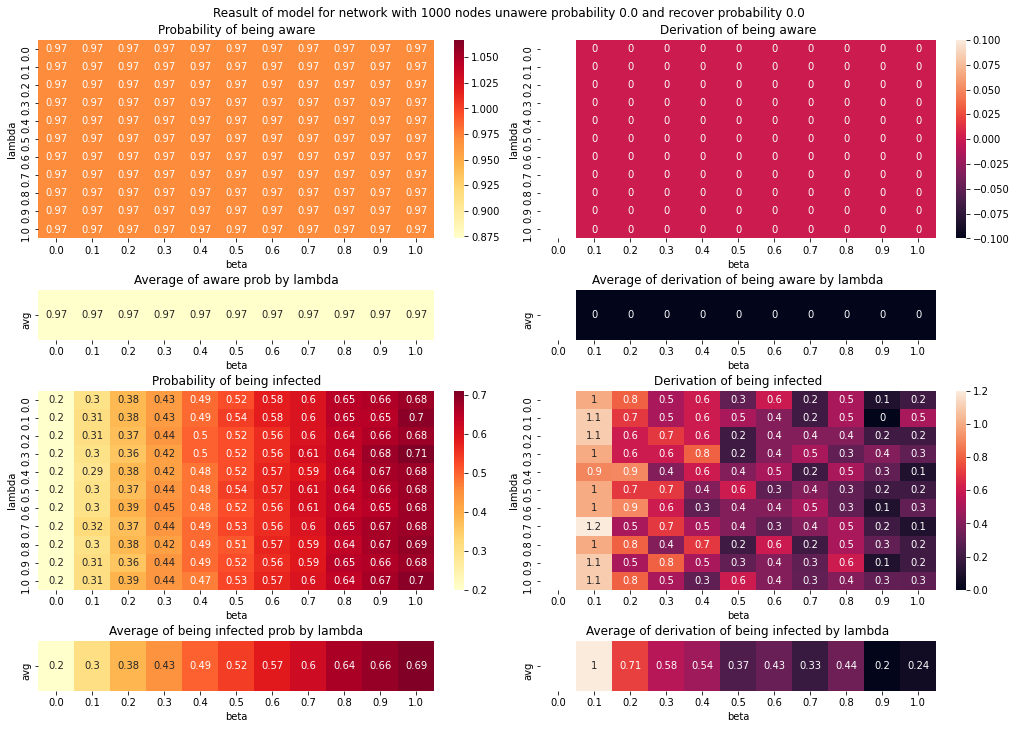

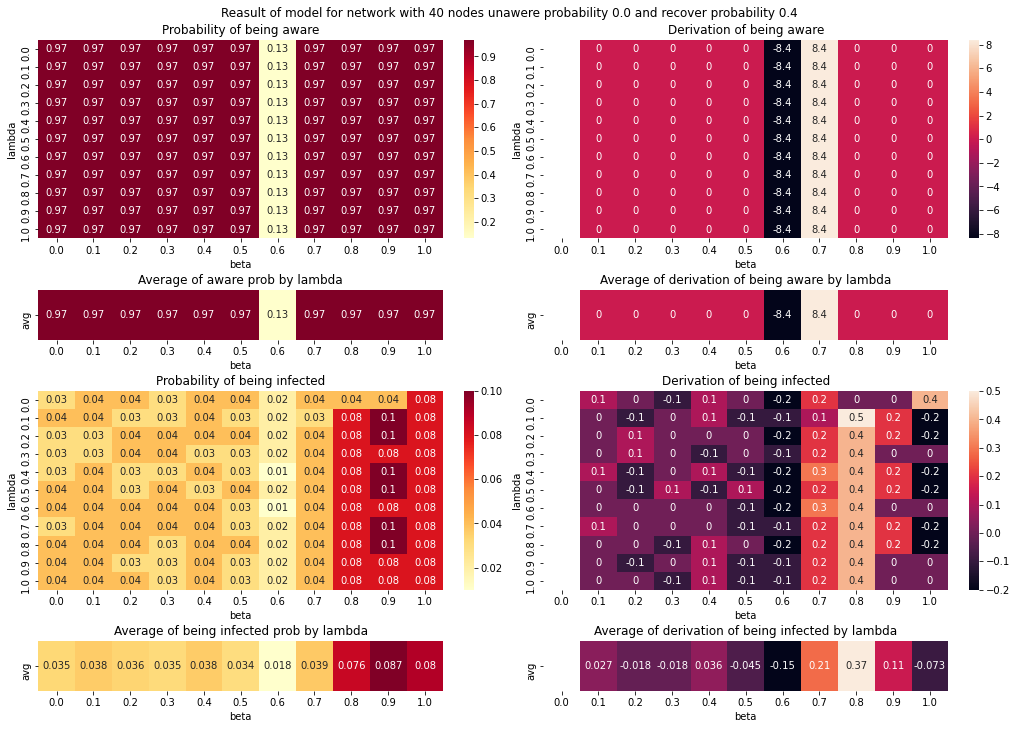

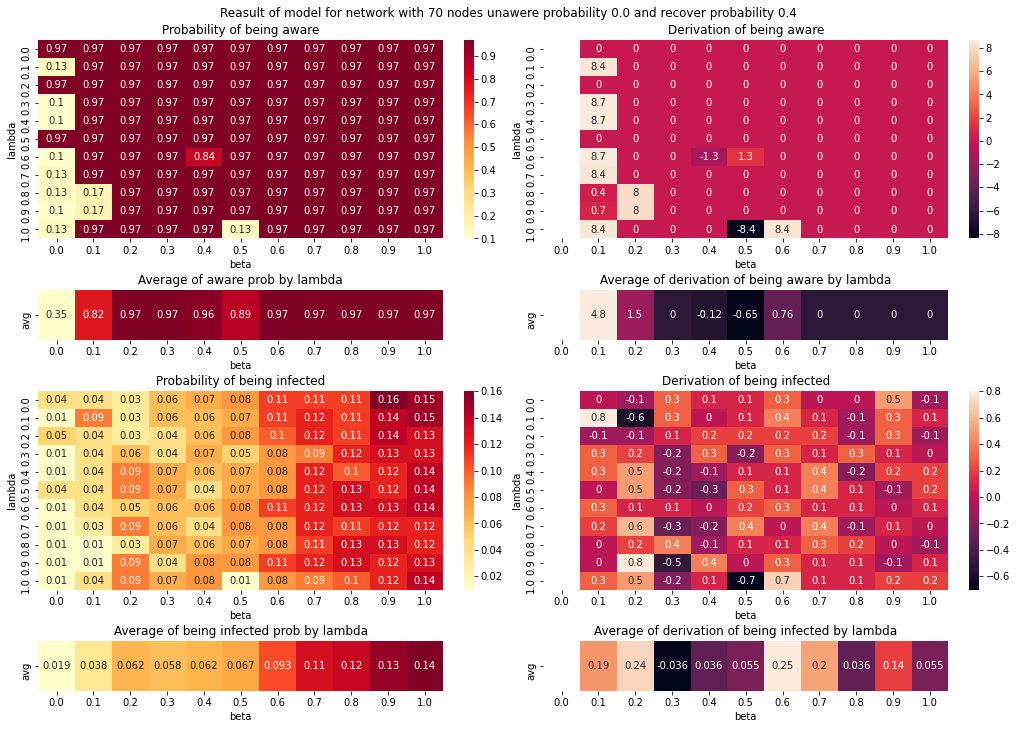

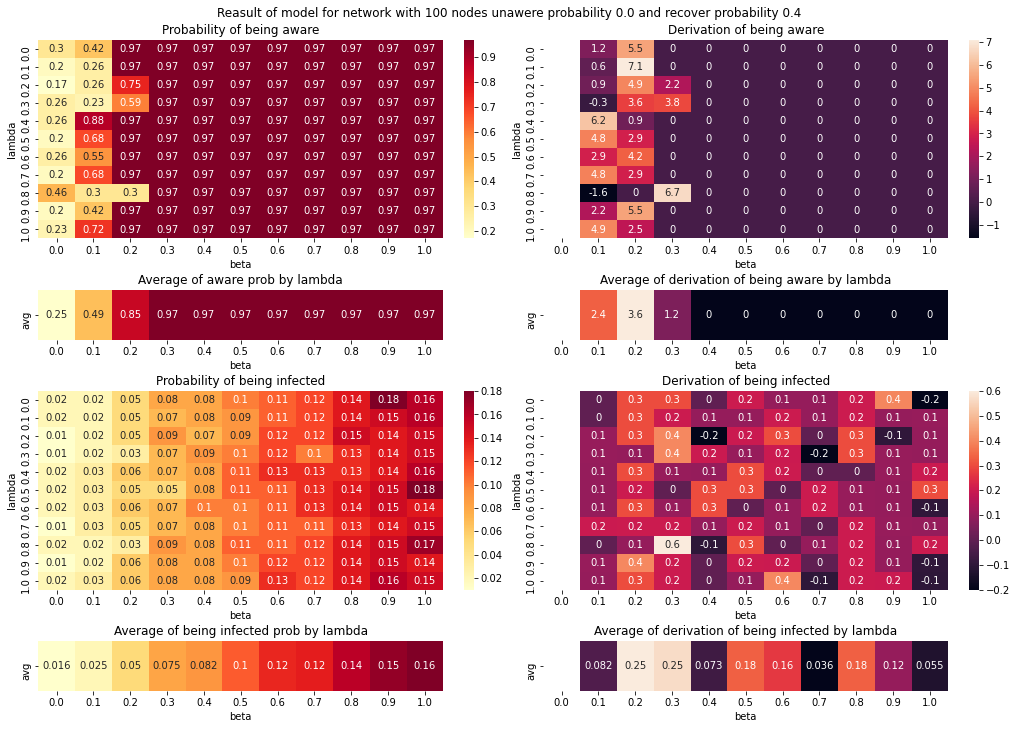

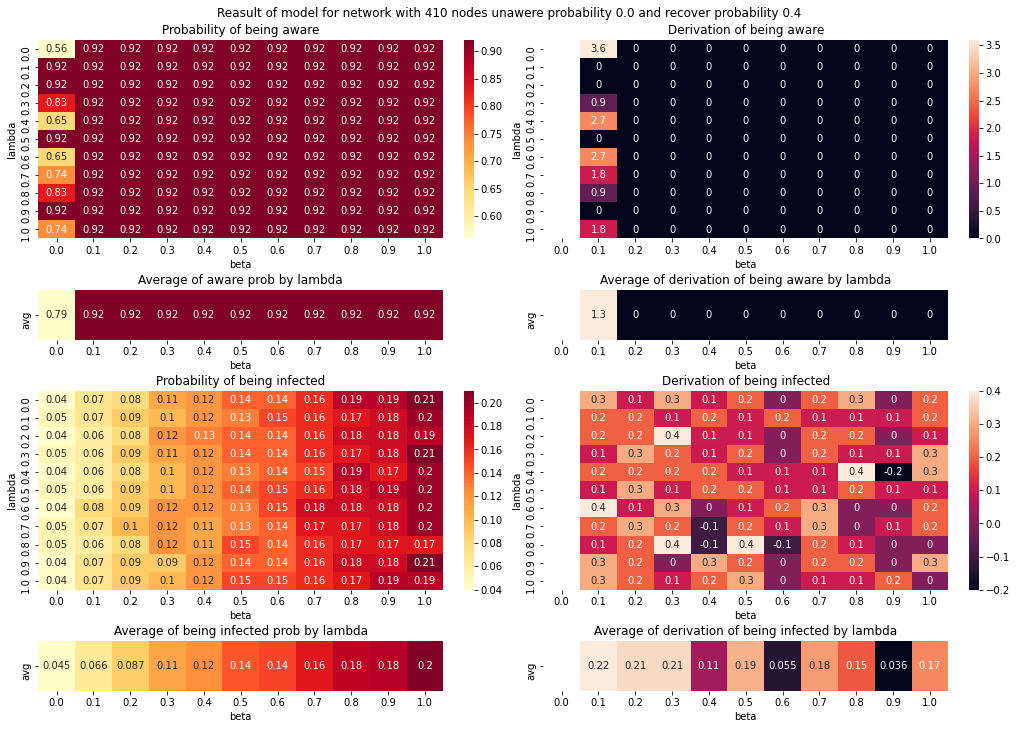

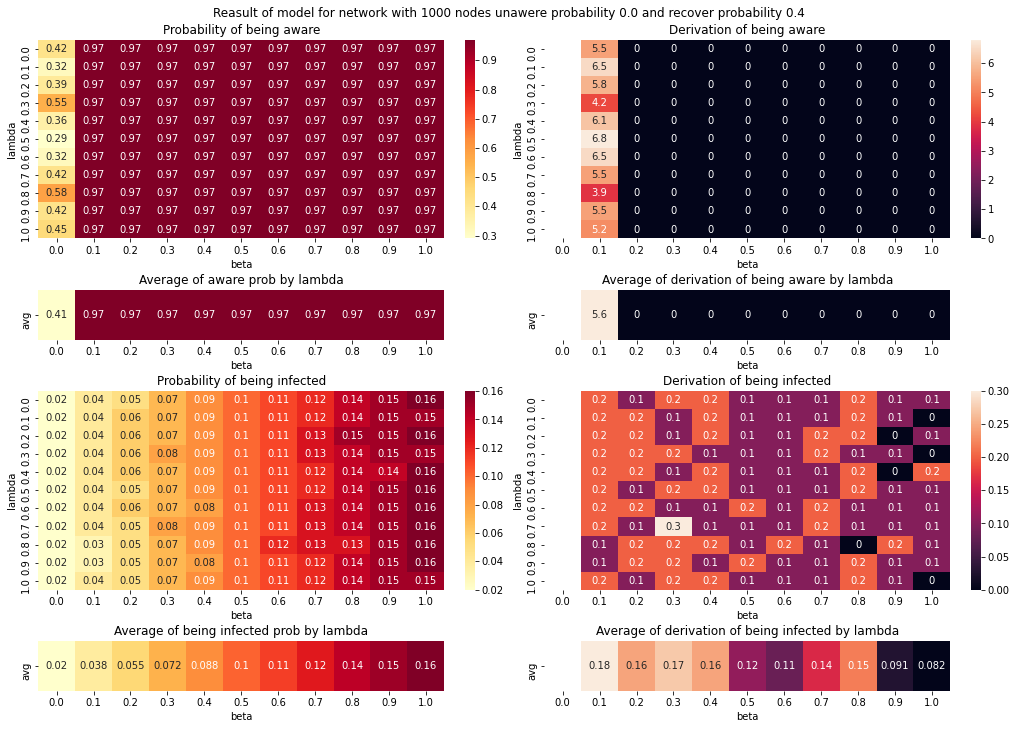

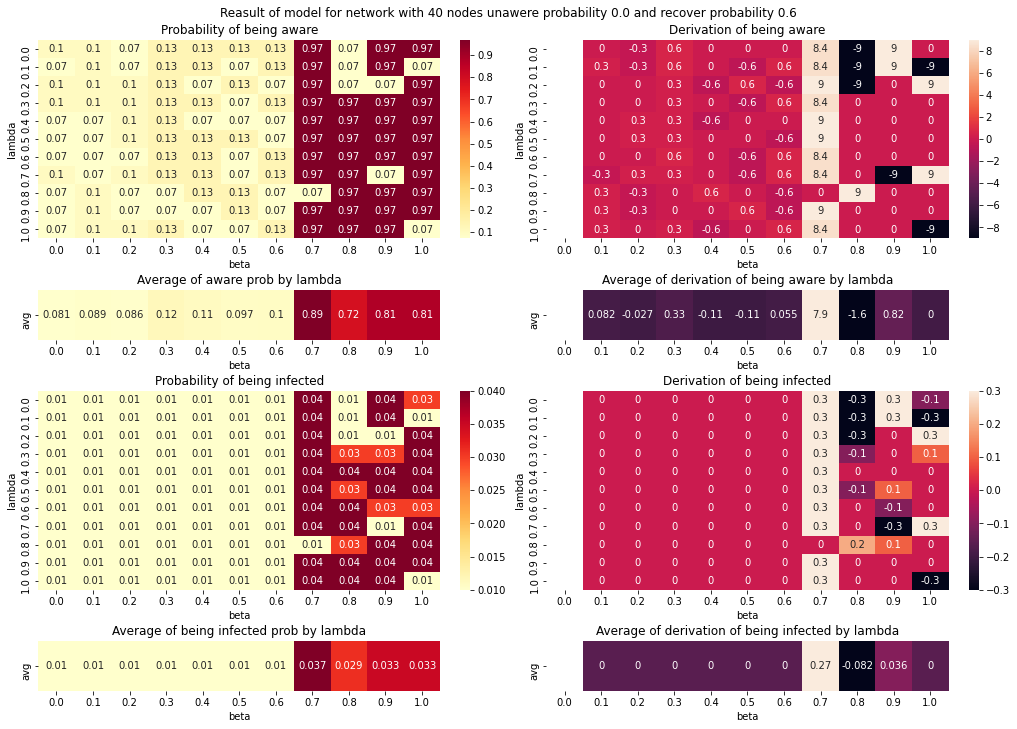

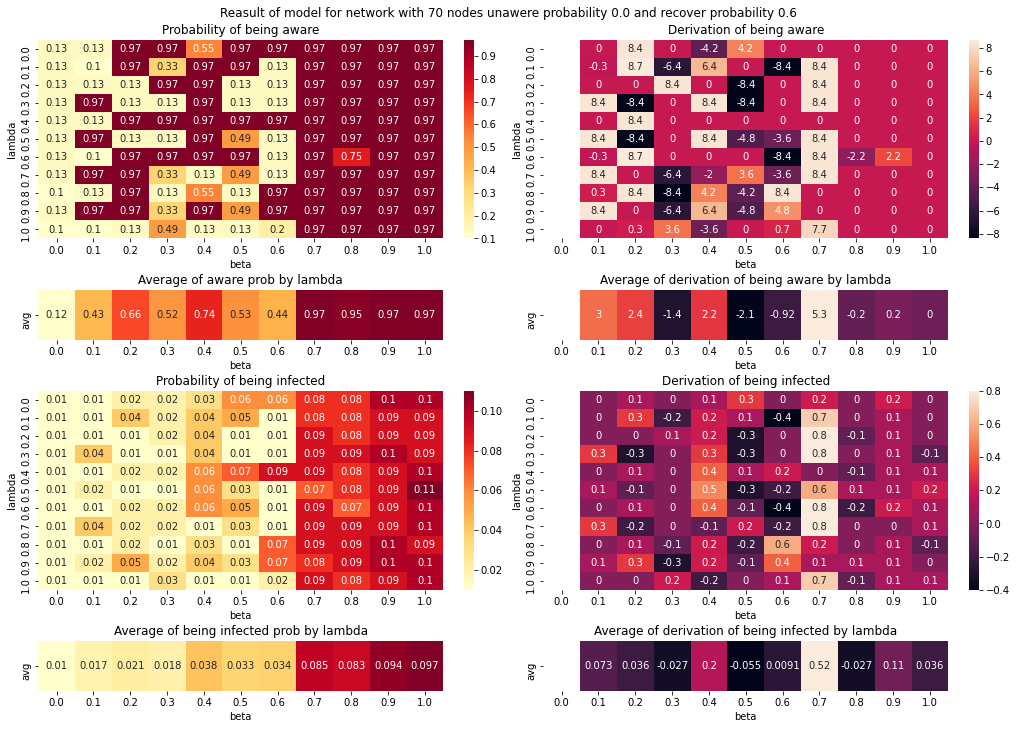

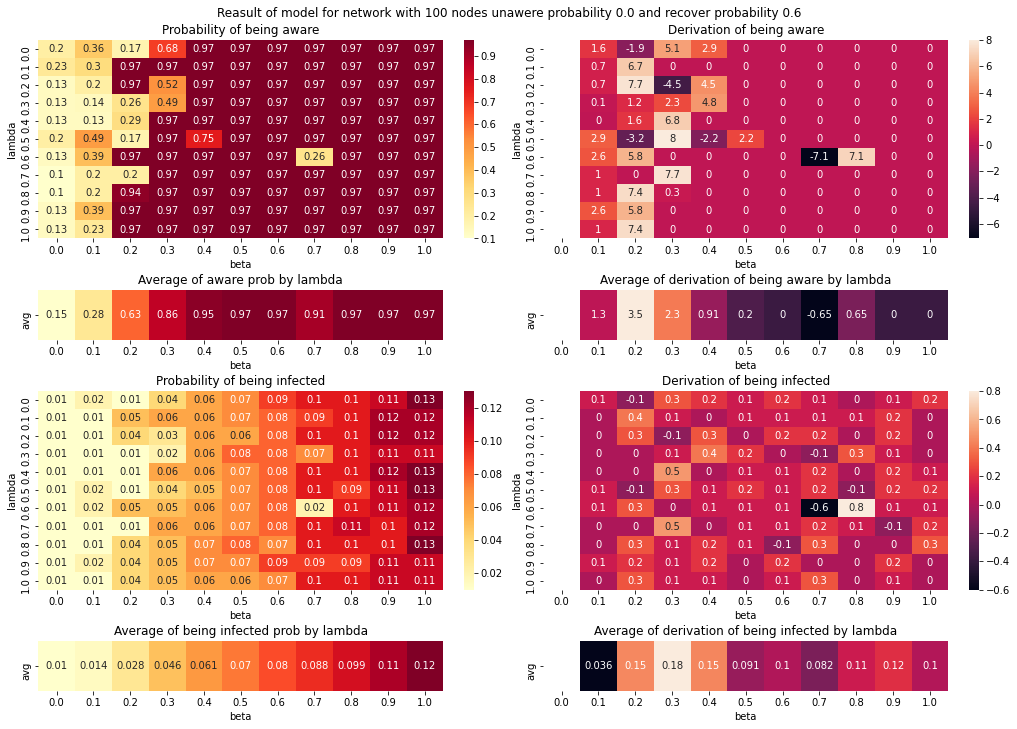

In [4]:
a = [[0.0, 0.4, 0.6, 1.0], [0.0, 0.4, 0.6, 1.0]]
nodes_numbers = [40, 70, 100, 410, 1000]
for index, parameters in enumerate(itertools.product(*a)):
    for nodes_number in nodes_numbers:
        if nodes_number == 40:
            name = "hiv"
        elif nodes_number == 70:
            name = "school"
        elif nodes_number == 410:
            name = "infectious"
        else:
            name = f"barabassi{nodes_number}"

        ploting(parameters[0], parameters[1], nodes_number, f"plots/basic_model/{name}/wyniki{index+1}.pdf")

In [8]:
@widgets.interact(hidden_infectivity=(0,1,0.1), physical_infectivity=(0,1,0.1), nodes_number=[40, 70, 100, 410, 1000])
def ploting(hidden_infectivity=0.4, physical_infectivity=0.6, nodes_number=100):
    df = data.loc[(data['hidden_infectivity'] == hidden_infectivity) & (data['physical_infectivity'] == physical_infectivity) & (data['nodes'] == nodes_number)]
    test = df[['beta', 'lambda', 'aware', 'infected']]

    fig = plt.figure(constrained_layout=True, figsize=(14,10))
    grid = fig.add_gridspec(10, 2)

    ax1 = fig.add_subplot(grid[0:4, 0])
    ax2 = fig.add_subplot(grid[0:4, 1])
    ax3 = fig.add_subplot(grid[4, 0])
    ax4 = fig.add_subplot(grid[4, 1])
    ax5 = fig.add_subplot(grid[5:9, 0])
    ax6 = fig.add_subplot(grid[5:9, 1])
    ax7 = fig.add_subplot(grid[9, 0])
    ax8 = fig.add_subplot(grid[9, 1])

    fig.suptitle(f"Reasult of model for network with {nodes_number} nodes unawere probability {hidden_infectivity} and recover probability {physical_infectivity}")

    aware_pivot = test.pivot(columns='beta', index='lambda', values='aware')
    sns.heatmap(aware_pivot, annot=True, vmax=aware_pivot.max().max(), vmin=aware_pivot.min().min(), cmap="YlOrRd", ax=ax1)
    ax1.set_title('Probability of being aware')

    deriv_aware = aware_pivot.diff(periods=1, axis=1)*10
    sns.heatmap(deriv_aware, annot=True, vmax=deriv_aware.max().max(), vmin=deriv_aware.min().min(), ax=ax2)
    ax2.set_title('Derivation of being aware')

    aware_avg = aware_pivot.mean(axis=0).to_frame("avg").T
    sns.heatmap(aware_avg, cmap="YlOrRd", cbar=False, annot=True, ax=ax3)
    ax3.set_title('Average of aware prob by lambda')

    deriv_aware_avg = deriv_aware.mean(axis=0).to_frame("avg").T
    sns.heatmap(deriv_aware_avg, cbar=False, annot=True, ax=ax4)
    ax4.set_title('Average of derivation of being aware by lambda')

    infected_pivot = test.pivot(columns='beta', index='lambda', values='infected')
    sns.heatmap(infected_pivot, annot=True, vmax=infected_pivot.max().max(), vmin=infected_pivot.min().min(), cmap="YlOrRd", ax=ax5)
    ax5.set_title('Probability of being infected')

    deriv_infected = infected_pivot.diff(periods=1, axis=1)*10
    sns.heatmap(deriv_infected, annot=True, vmax=deriv_infected.max().max(), vmin=deriv_infected.min().min(), ax=ax6)
    ax6.set_title('Derivation of being infected')

    infected_avg = infected_pivot.mean(axis=0).to_frame("avg").T
    sns.heatmap(infected_avg, cmap="YlOrRd", cbar=False, annot=True, ax=ax7)
    ax7.set_title('Average of being infected prob by lambda')

    deriv_infected_avg = deriv_infected.mean(axis=0).to_frame("avg").T
    sns.heatmap(deriv_infected_avg, cbar=False, annot=True, ax=ax8)
    ax8.set_title('Average of derivation of being infected by lambda')
    #plt.savefig(savepath)

    # df = data.loc[(data['hidden_infectivity'] == hidden_infectivity) & (data['physical_infectivity'] == physical_infectivity) & (data['nodes'] == nodes_number)]
    # test = df[['beta', 'lambda', 'aware', 'infected']]
    # aware_pivot = test.pivot(columns='beta', index='lambda', values='aware')
    # deriv_aware = aware_pivot.diff(periods=1, axis=1)
    # infected_pivot = test.pivot(columns='beta', index='lambda', values='infected')
    # deriv_infected = infected_pivot.diff(periods=1, axis=1)
    # fig, axes = plt.subplots(2, 2, figsize=(12,12))
    # fig.suptitle(f"Reasult of model for network with {nodes_number} nodes unawere probability {hidden_infectivity} and recover probability {physical_infectivity}")
    # sns.heatmap(aware_pivot, annot=True, vmax=aware_pivot.max().max(), vmin=aware_pivot.min().min(), cmap="YlOrRd", ax=axes[0, 0])
    # axes[0, 0].set_title('Probability of being aware')
    # sns.heatmap(deriv_aware, annot=True, vmax=deriv_aware.max().max(), vmin=deriv_aware.min().min(), ax=axes[0, 1])
    # axes[0, 1].set_title('Derivation of being aware')
    # sns.heatmap(infected_pivot, annot=True, vmax=infected_pivot.max().max(), vmin=infected_pivot.min().min(), cmap="YlOrRd", ax=axes[1, 0])
    # axes[1, 0].set_title('Probability of being infected')
    # sns.heatmap(deriv_infected, annot=True, vmax=deriv_infected.max().max(), vmin=deriv_infected.min().min(), ax=axes[1, 1])
    # axes[1, 1].set_title('Derivation of being infected')
    # plt.tight_layout()

interactive(children=(FloatSlider(value=0.4, description='hidden_infectivity', max=1.0), FloatSlider(value=0.6…

In [2]:
data = pd.read_csv("pomiary2.csv")
data = data.round(2)

In [18]:
data.head()

nodes  rho       network  beta  lambda  media  factor  \
0  100.0  0.2  barabassi100   0.2     0.2    0.0    0.01   
1  100.0  0.2  barabassi100   0.4     0.2    0.0    0.01   
2  100.0  0.2  barabassi100   0.2     0.4    0.0    0.01   
3  100.0  0.2  barabassi100   0.2     0.3    0.0    0.01   
4  100.0  0.2  barabassi100   0.3     1.0    0.0    0.01   

   physical_infectivity  hidden_infectivity  aware  infected  
0                   0.0                 0.0   0.93      0.37  
1                   0.0                 0.0   0.93      0.47  
2                   0.0                 0.0   0.93      0.37  
3                   0.0                 0.0   0.93      0.38  
4                   0.0                 0.0   0.93      0.39

In [19]:

# Main problem here is nnot very interactive or informative. Very Pretty though! 
# other problem is colorbar takes up space normally used for figure. Also not interactive. 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from pylab import *

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

#colors = cm.hsv(the_fourth_dimension/max(the_fourth_dimension))

colmap = cm.ScalarMappable(cmap=cm.Greens_r)
colmap.set_array(data[['aware']])

# reference for cmap. note cmap and c are different!
# http://matplotlib.org/examples/color/colormaps_reference.html
ax.scatter(data[['beta']], data[['lambda']], data[['media']], marker='s',s = 140, c=data[['aware']], cmap='Greens_r');
cb = fig.colorbar(colmap)

ax.set_xlabel('beta')
ax.set_ylabel('lambda')
ax.set_zlabel('media')
plt.show()
# change view angle 
# http://infamousheelfilcher.blogspot.com/2013/02/changing-viewing-angle-of-matplotlib.html
#ax.view_init(azim = 0,elev = 0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
@widgets.interact(hidden_infectivity=(0,1,0.1), physical_infectivity=(0,1,0.1), beta=(0,1,0.1), nodes_number=[40, 70, 100, 410, 1000])
def ploting(hidden_infectivity=0.4, physical_infectivity=0.6, beta=0.5, nodes_number=100):
    sns.set()  # use Seaborn styles
    df = data.loc[(data['hidden_infectivity'] == hidden_infectivity) & (data['physical_infectivity'] == physical_infectivity) &
                  (data['nodes'] == nodes_number) & (data['beta'] == beta) & (data['media'].isin([0.1, 0.3, 0.5, 0.7]))]
    test = df[['lambda', 'aware', 'media', 'infected']]
    test.pivot(columns='media', index='lambda', values='aware').plot(figsize=(25, 10))
    plt.tight_layout()

interactive(children=(FloatSlider(value=0.4, description='hidden_infectivity', max=1.0), FloatSlider(value=0.6…

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
@widgets.interact(hidden_infectivity=(0,1,0.1), physical_infectivity=(0,1,0.1), _lambda=(0,1,0.1), nodes_number=[40, 70, 100, 410, 1000])
def ploting(hidden_infectivity=0.4, physical_infectivity=0.6, _lambda=0.5, nodes_number=100):
    df = data.loc[(data['hidden_infectivity'] == hidden_infectivity) & (data['physical_infectivity'] == physical_infectivity) &
                  (data['nodes'] == nodes_number) & (data['lambda'] == _lambda) & (data['media'].isin([0.1, 0.3, 0.5, 0.7]))]
    test = df[['beta', 'aware', 'media', 'infected']]
    test.pivot(columns='media', index='beta', values='aware').plot(figsize=(25, 10))
    plt.tight_layout()

interactive(children=(FloatSlider(value=0.4, description='hidden_infectivity', max=1.0), FloatSlider(value=0.6…

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
@widgets.interact(hidden_infectivity=(0,1,0.1), physical_infectivity=(0,1,0.1), _lambda=(0,1,0.1), nodes_number=[40, 70, 100, 410, 1000])
def ploting(hidden_infectivity=0.4, physical_infectivity=0.6, _lambda=0.5, nodes_number=100):
    df = data.loc[(data['hidden_infectivity'] == hidden_infectivity) & (data['physical_infectivity'] == physical_infectivity) &
                  (data['nodes'] == nodes_number) & (data['lambda'] == _lambda) & (data['beta'].isin([0.1, 0.3, 0.5, 0.7]))]
    test = df[['beta', 'aware', 'media', 'infected']]
    test.pivot(columns='beta', index='media', values='aware').plot(figsize=(25, 10))
    plt.tight_layout()

interactive(children=(FloatSlider(value=0.4, description='hidden_infectivity', max=1.0), FloatSlider(value=0.6…

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
@widgets.interact(hidden_infectivity=(0,1,0.1), physical_infectivity=(0,1,0.1), _lambda=(0,1,0.1), nodes_number=[40, 70, 100, 410, 1000])
def ploting(hidden_infectivity=0.4, physical_infectivity=0.6, _lambda=0.5, nodes_number=100):
    df = data.loc[(data['hidden_infectivity'] == hidden_infectivity) & (data['physical_infectivity'] == physical_infectivity) &
                  (data['nodes'] == nodes_number) & (data['lambda'] == _lambda) & (data['beta'].isin([0.1, 0.3, 0.5, 0.7]))]
    test = df[['beta', 'aware', 'media', 'infected']]
    test.pivot(columns='beta', index='media', values='infected').plot(figsize=(25, 10))
    plt.tight_layout()

interactive(children=(FloatSlider(value=0.4, description='hidden_infectivity', max=1.0), FloatSlider(value=0.6…

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
@widgets.interact(hidden_infectivity=(0,1,0.1), physical_infectivity=(0,1,0.1), _lambda=(0,1,0.1), nodes_number=[40, 70, 100, 410, 1000])
def ploting(hidden_infectivity=0.4, physical_infectivity=0.6, beta=0.5, nodes_number=100):
    df = data.loc[(data['hidden_infectivity'] == hidden_infectivity) & (data['physical_infectivity'] == physical_infectivity) &
                  (data['nodes'] == nodes_number) & (data['beta'] == beta) & (data['lambda'].isin([0.1, 0.3, 0.5, 0.7]))]
    test = df[['lambda', 'aware', 'media', 'infected']]
    test.pivot(columns='lambda', index='media', values='aware').plot(figsize=(25, 10))
    plt.tight_layout()

interactive(children=(FloatSlider(value=0.4, description='hidden_infectivity', max=1.0), FloatSlider(value=0.6…

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # use Seaborn styles
@widgets.interact(hidden_infectivity=(0,1,0.1), physical_infectivity=(0,1,0.1), _lambda=(0,1,0.1), nodes_number=[40, 70, 100, 410, 1000])
def ploting(hidden_infectivity=0.4, physical_infectivity=0.6, beta=0.5, nodes_number=100):
    df = data.loc[(data['hidden_infectivity'] == hidden_infectivity) & (data['physical_infectivity'] == physical_infectivity) &
                  (data['nodes'] == nodes_number) & (data['beta'] == beta) & (data['lambda'].isin([0.1, 0.3, 0.5, 0.7]))]
    test = df[['lambda', 'aware', 'media', 'infected']]
    test.pivot(columns='lambda', index='media', values='infected').plot(figsize=(25, 10))
    plt.tight_layout()

interactive(children=(FloatSlider(value=0.4, description='hidden_infectivity', max=1.0), FloatSlider(value=0.6…

In [26]:
@widgets.interact(hidden_infectivity=(0,1,0.1), physical_infectivity=(0,1,0.1), media=(0,1,0.1), nodes_number=[40, 70, 100, 410, 1000])
def ploting(hidden_infectivity=0.4, physical_infectivity=0.6, media=0.0, nodes_number=100):
    df = data.loc[(data['hidden_infectivity'] == hidden_infectivity) & (data['physical_infectivity'] == physical_infectivity) & (data['media'] == media) & (data['nodes'] == nodes_number)]
    test = df[['beta', 'lambda', 'aware', 'infected']]
    aware_pivot = test.pivot(columns='beta', index='lambda', values='aware')
    deriv_aware = aware_pivot.diff(periods=1, axis=1)
    infected_pivot = test.pivot(columns='beta', index='lambda', values='infected')
    deriv_infected = infected_pivot.diff(periods=1, axis=1)
    fig, axes = plt.subplots(2, 2, figsize=(12,12))
    fig.suptitle(f"Reasult of model for network with {nodes_number} nodes unawere probability {hidden_infectivity} and recover probability {physical_infectivity}")
    sns.heatmap(aware_pivot, annot=True, vmax=aware_pivot.max().max(), vmin=aware_pivot.min().min(), cmap="YlOrRd", ax=axes[0, 0])
    axes[0, 0].set_title('Probability of being aware')
    sns.heatmap(deriv_aware, annot=True, vmax=deriv_aware.max().max(), vmin=deriv_aware.min().min(), ax=axes[0, 1])
    axes[0, 1].set_title('Derivation of being aware')
    sns.heatmap(infected_pivot, annot=True, vmax=infected_pivot.max().max(), vmin=infected_pivot.min().min(), cmap="YlOrRd", ax=axes[1, 0])
    axes[1, 0].set_title('Probability of being infected')
    sns.heatmap(deriv_infected, annot=True, vmax=deriv_infected.max().max(), vmin=deriv_infected.min().min(), ax=axes[1, 1])
    axes[1, 1].set_title('Derivation of being infected')
    plt.tight_layout()

interactive(children=(FloatSlider(value=0.4, description='hidden_infectivity', max=1.0), FloatSlider(value=0.6…

In [5]:
import pandas as pd
data = pd.read_csv("pomiary.csv")
data = data.round(2)

In [9]:
data2 = pd.read_csv("pomiary2.csv")
data2 = data2.round(2)

In [10]:
data

nodes  rho     network  beta  lambda  factor  physical_infectivity  \
0        100  0.2   barabassi   0.3     0.6    0.01                   0.0   
1        100  0.2   barabassi   0.3     0.0    0.01                   0.0   
2        100  0.2   barabassi   0.4     0.0    0.01                   0.0   
3        100  0.2   barabassi   0.2     0.9    0.01                   0.0   
4        100  0.2   barabassi   0.4     0.2    0.01                   0.0   
...      ...  ...         ...   ...     ...     ...                   ...   
73200    410  0.2  infectious   1.0     0.7    0.01                   1.0   
73201    410  0.2  infectious   0.7     1.0    0.01                   1.0   
73202    410  0.2  infectious   0.9     1.0    0.01                   1.0   
73203    410  0.2  infectious   1.0     1.0    0.01                   1.0   
73204    410  0.2  infectious   1.0     0.9    0.01                   1.0   

       hidden_infectivity  aware  infected  
0                     0.0   0.97      0.44  
1                     0.0   0.97      0.42  
2                     0.0   0.97      0.52  
3                     0.0   0.97      0.44  
4                     0.0   0.97      0.47  
...                   ...    ...       ...  
73200                 1.0   0.27      0.27  
73201                 1.0   0.18      0.18  
73202                 1.0   0.23      0.23  
73203                 1.0   0.26      0.26  
73204                 1.0   0.27      0.27  

[73205 rows x 10 columns]

In [11]:
data2

nodes  rho       network  beta  lambda  media  factor  \
0       100.0  0.2  barabassi100   0.2     0.2    0.0    0.01   
1       100.0  0.2  barabassi100   0.4     0.2    0.0    0.01   
2       100.0  0.2  barabassi100   0.2     0.4    0.0    0.01   
3       100.0  0.2  barabassi100   0.2     0.3    0.0    0.01   
4       100.0  0.2  barabassi100   0.3     1.0    0.0    0.01   
...       ...  ...           ...   ...     ...    ...     ...   
585553  410.0  0.2    infectious   0.7     0.1    0.6    0.01   
585554  410.0  0.2    infectious   0.7     0.2    0.6    0.01   
585555  410.0  0.2    infectious   0.7     0.3    0.6    0.01   
585556  410.0  0.2    infectious   0.7     0.4    0.6    0.01   
585557  410.0  0.2    infectious   0.7     0.5    0.6    0.01   

        physical_infectivity  hidden_infectivity  aware  infected  
0                        0.0                 0.0   0.93      0.37  
1                        0.0                 0.0   0.93      0.47  
2                        0.0                 0.0   0.93      0.37  
3                        0.0                 0.0   0.93      0.38  
4                        0.0                 0.0   0.93      0.39  
...                      ...                 ...    ...       ...  
585553                   1.0                 1.0   0.81      0.28  
585554                   1.0                 1.0   0.81      0.28  
585555                   1.0                 1.0   0.81      0.28  
585556                   1.0                 1.0   0.81      0.28  
585557                   1.0                 1.0   0.80      0.28  

[585558 rows x 11 columns]

In [ ]:
#658763